### Deep Learning based Time Series Clustering Algorithms 

Deep Learning based clustering algorithms for time series are those where `k` clusters are created from `n` time series. The aim is to cluster so that each time series in a cluster are homogenous (similar) to each other and heterogeneous (dissimilar) to those outside the cluster. 

Various Deep Learning based Auto-Encoders help in building a low rank representation of the time series, also know as, the latent space or feature extraction. Traditional time series clustering algorithms like KMeans, KNN etc present in aeon are trained on the latent space to get clusters. 

Contents 

- AEDRNNClusterer : Auto-Encoder based on Dilated Recurrent Neural Networks (DRNN).



In [1]:
# Import necessary libraries
from aeon.clustering.deep_learning import AEDRNNClusterer
from aeon.datasets import load_unit_test
from aeon.utils.validation._dependencies import _check_soft_dependencies
from aeon.visualisation import plot_cluster_algorithm

if _check_soft_dependencies(["matplotlib"]):
    import matplotlib.pyplot as plt

/home/aadya/.local/lib/python3.10/site-packages/aeon/base/__init__.py:24: FutureWarning: The aeon package will soon be releasing v1.0.0 with the removal of legacy modules and interfaces such as BaseTransformer and BaseForecaster. This will contain breaking changes. See aeon-toolkit.org for more information. Set aeon.AEON_DEPRECATION_WARNING or the AEON_DEPRECATION_WARNING environmental variable to 'False' to disable this warning.
  warnings.warn(
2024-07-25 16:44:14.592110: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/aadya/.local/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 13.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further detail

In [2]:
# Load the dataset to be clustered
X_train, y_train = load_unit_test(split="train")
(
    X_test,
    y_test,
) = load_unit_test(split="test")
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(20, 1, 24) (20,) (22, 1, 24) (22,)


In [3]:
# Define the clusterer with 2 clusters, KMeans algorithm for the latent space
# and train it for 2000 epoch
aedrnn_clusterer = AEDRNNClusterer(
    n_clusters=2,
    clustering_algorithm="kmeans",
    n_epochs=2,
    verbose=True,
    save_best_model=True,
)

In [4]:
# Fit the clusterer
aedrnn_clusterer.fit(X_train)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input layer (InputLayer)        │ (None, 24, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional (Functional)         │ (None, 128)            │       234,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_1 (Functional)       │ (None, 24, 1)          │     2,561,201 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputlayer (Reshape)           │ (None, 24, 1)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,795,529 (10.66 MB)

 Trainable params: 2,795,529 (10.66 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step - loss: 687882.5625 - learning_rate: 0.0010
Epoch 2/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 662577.8750 - learning_rate: 0.0010
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


AEDRNNClusterer(n_clusters=2, n_epochs=2, save_best_model=True, verbose=True)

In [5]:
# Calculate Score
aedrnn_clusterer.score(X_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


-13176.062242418528

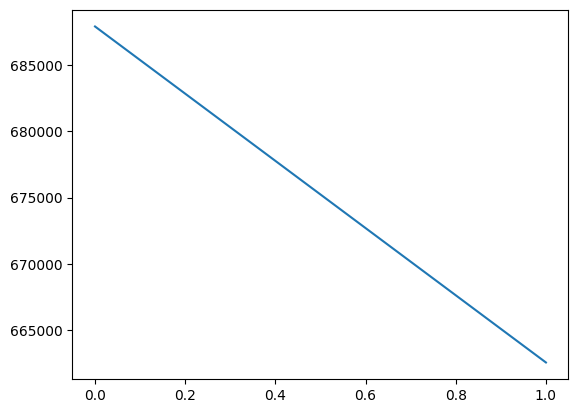

In [6]:
# Plot history for epochs

history = aedrnn_clusterer.summary()

if _check_soft_dependencies(["matplotlib"]):
    plt.plot(history["loss"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

<Figure size 500x1000 with 0 Axes>

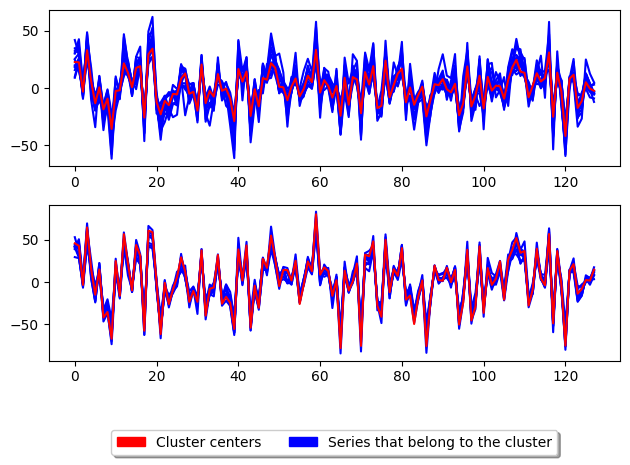

In [7]:
# Visualize the Algorithm
_X_test = X_test.transpose(0, 2, 1)
_latent_space = aedrnn_clusterer.model_.layers[1].predict(_X_test)
plot_cluster_algorithm(
    aedrnn_clusterer.clusterer, _latent_space, aedrnn_clusterer.n_clusters
)